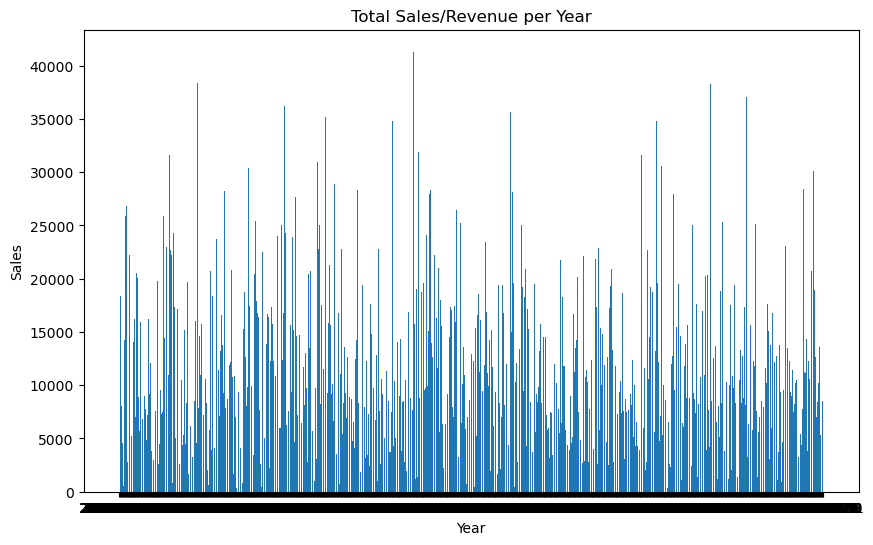

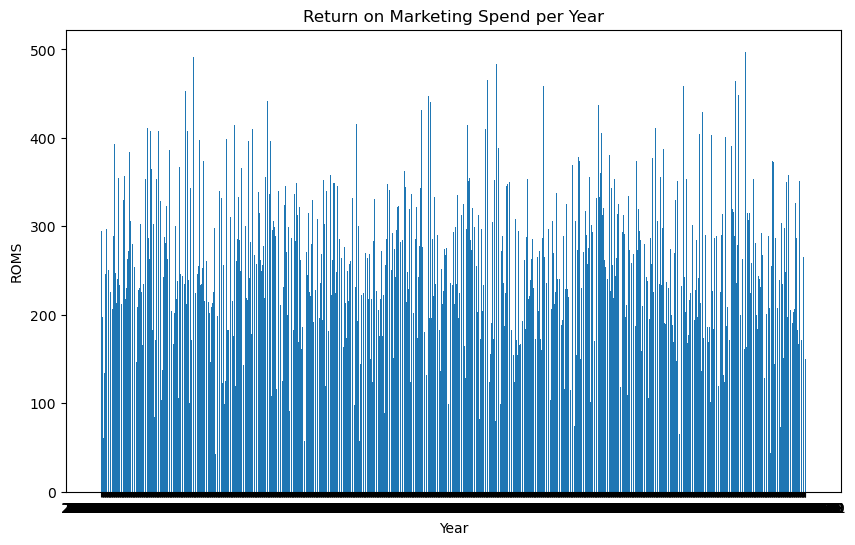

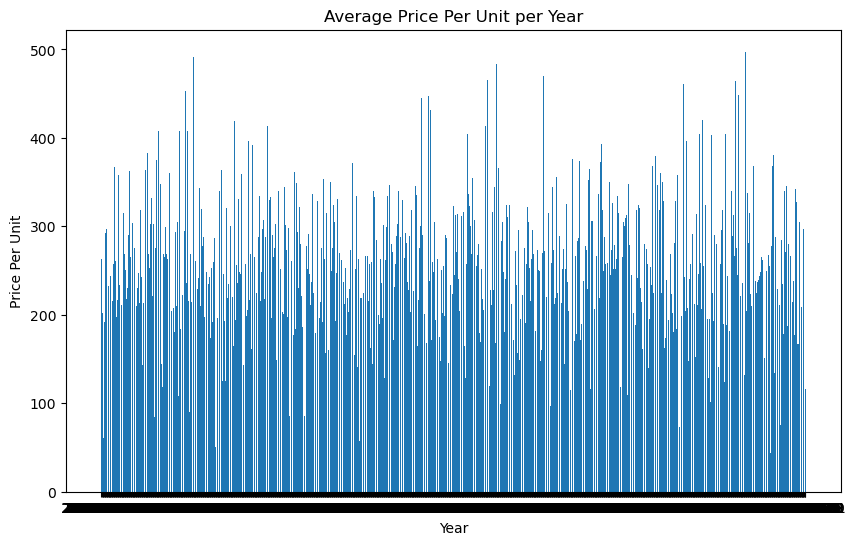

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF

# Load the sales data from the CSV file
data = pd.read_csv('sales_data1.csv')

# Calculate KPIs on a yearly basis
yearly_data = data.groupby('Date').agg({
    'TotalSales': 'sum',
    'QuantitySold': 'sum',
    'PricePerUnit': 'mean'
})

# Calculate Return on Marketing Spend per category
roms = yearly_data['TotalSales'] / yearly_data['QuantitySold']

# Create visual representations of the calculated KPIs
plt.figure(figsize=(10, 6))
plt.bar(yearly_data.index, yearly_data['TotalSales'])
plt.title('Total Sales/Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.savefig('total_sales.png')

plt.figure(figsize=(10, 6))
plt.bar(yearly_data.index, roms)
plt.title('Return on Marketing Spend per Year')
plt.xlabel('Year')
plt.ylabel('ROMS')
plt.savefig('roms.png')

plt.figure(figsize=(10, 6))
plt.bar(yearly_data.index, yearly_data['PricePerUnit'])
plt.title('Average Price Per Unit per Year')
plt.xlabel('Year')
plt.ylabel('Price Per Unit')
plt.savefig('average_price_per_unit.png')

# Generate a PDF file that includes the visualized KPIs
pdf = FPDF()
pdf.add_page()
pdf.image('total_sales.png')
pdf.image('roms.png')
pdf.image('average_price_per_unit.png')
pdf.output('kpi_dashboard.pdf')

# Save the data used for calculations to a CSV file
yearly_data.to_csv('kpi_data.csv')

In [3]:
import sys
!{sys.executable} -m pip install fpdf

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40713 sha256=a2168c588d9a787e0665264da0f5a675877a8b78fce73ffcd426ee614a77d63d
  Stored in directory: c:\users\malad\appdata\local\pip\cache\wheels\65\4f\66\bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf
